0
chemin le plus cours entre les arrets 20 et 75 dans le metro de Paris [120, 119, 295, 212, 213, 12, 1, 235, 284, 211, 86, 21, 75]
L'affichage est un peu long veuillez patientez


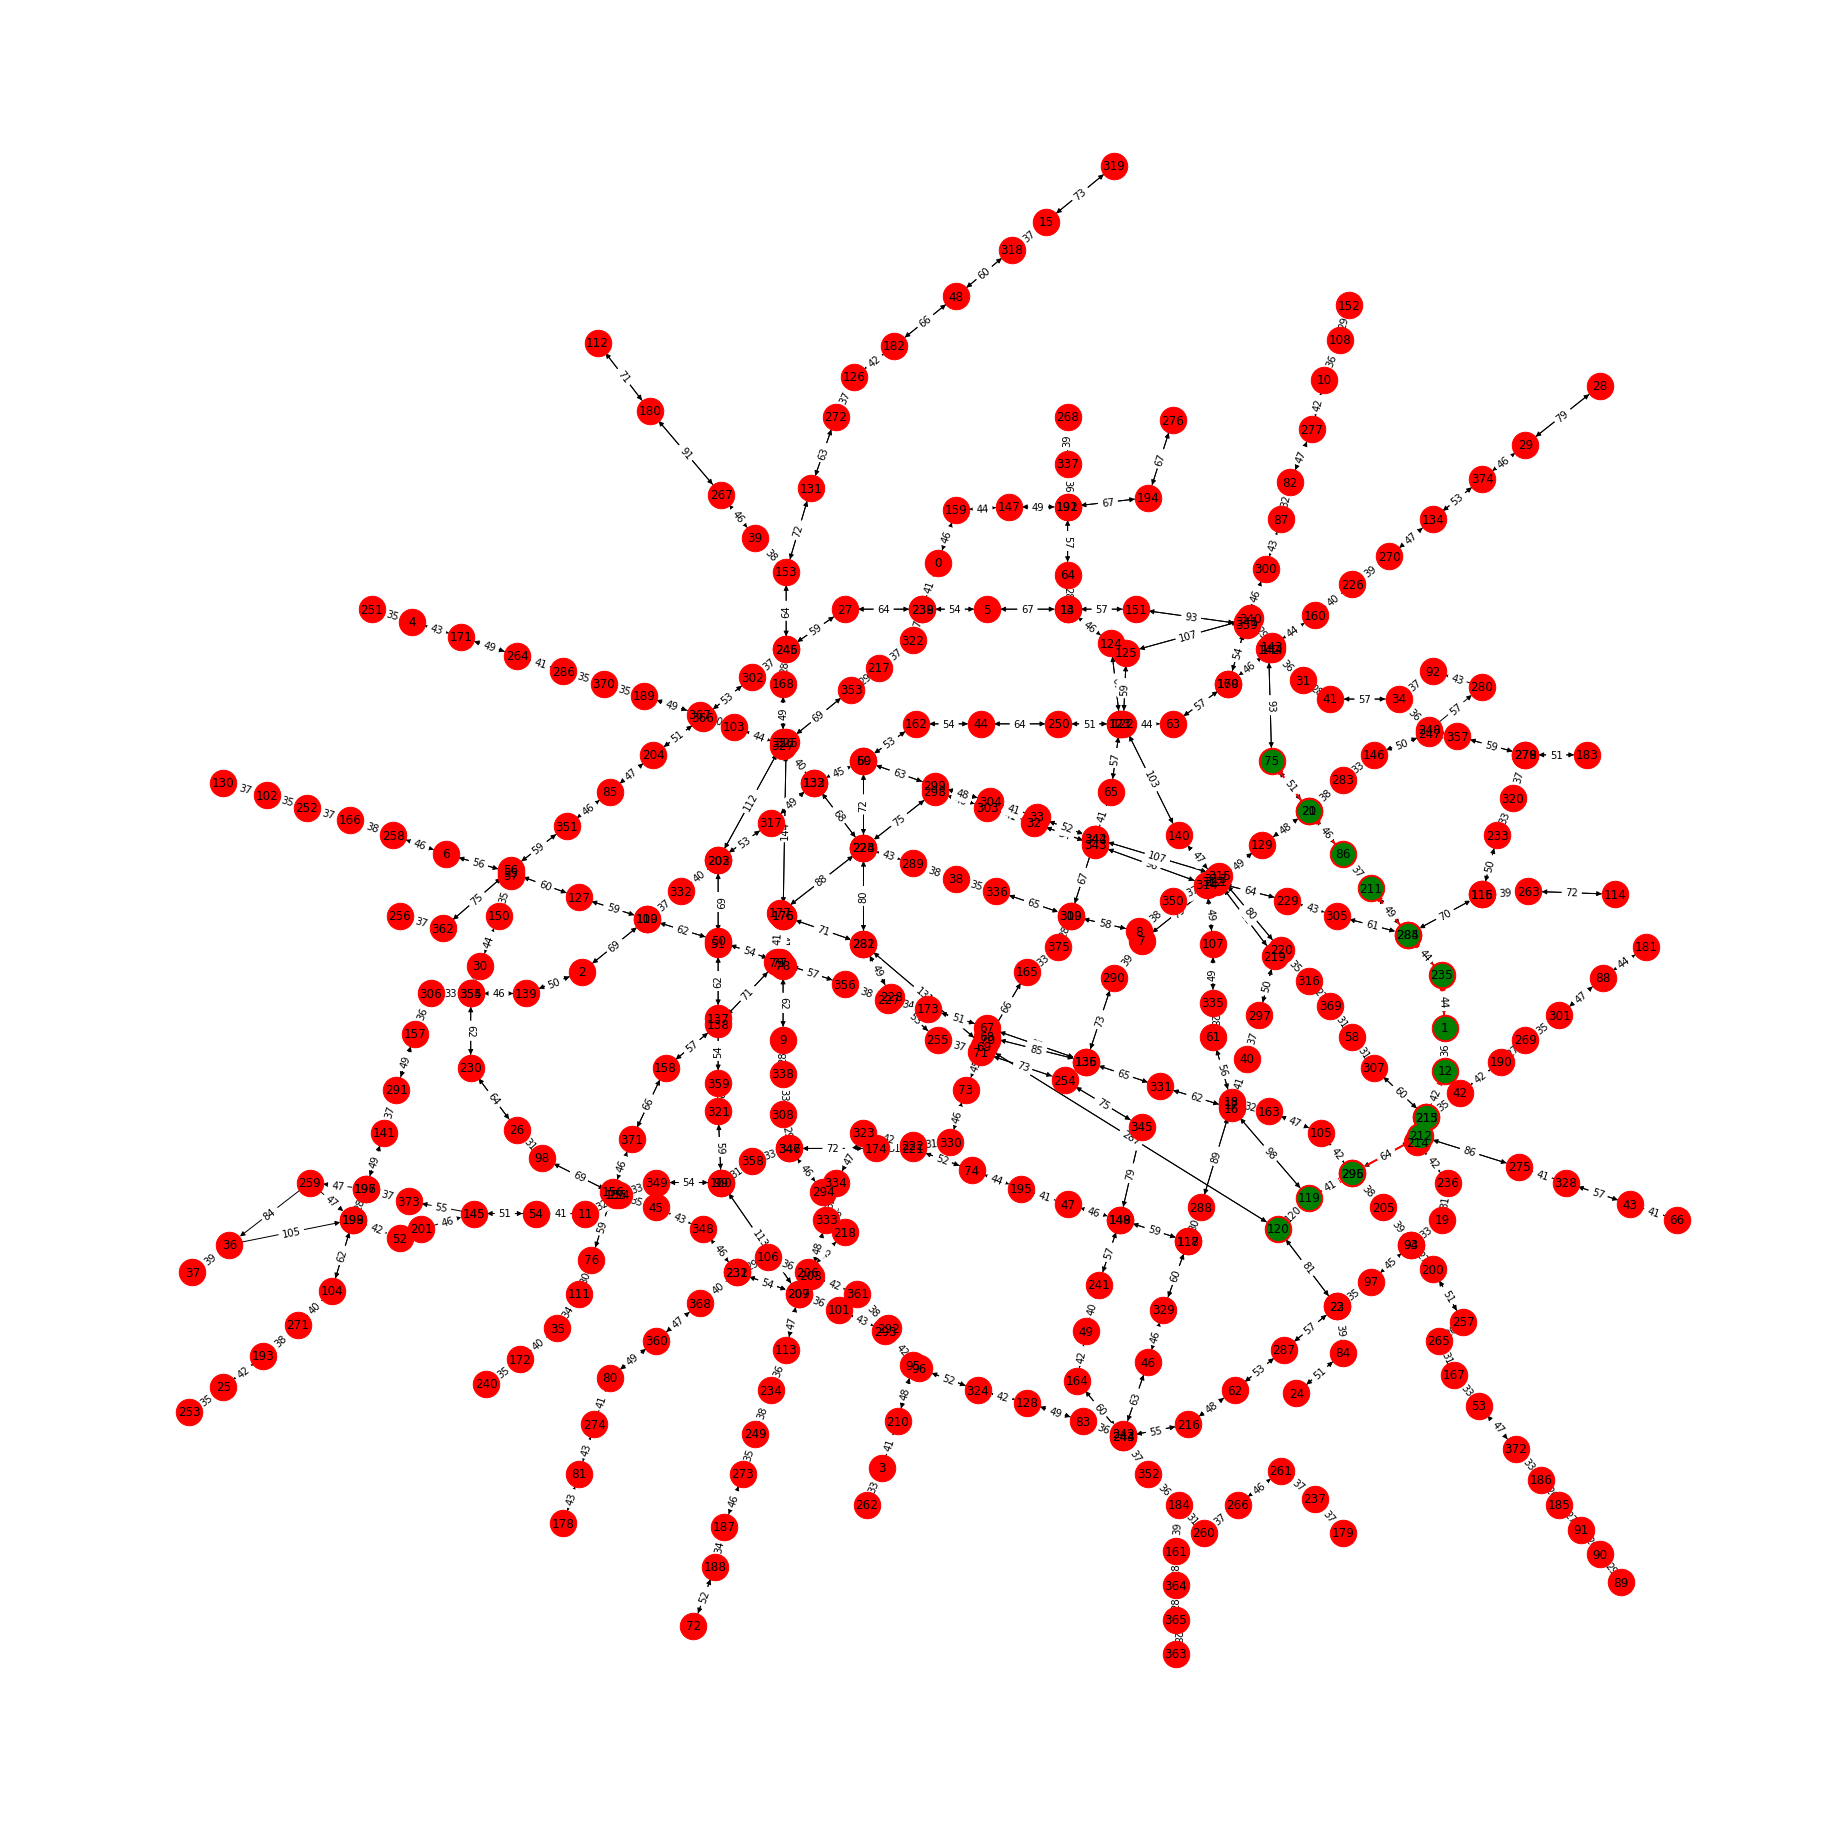

In [16]:
import networkx as nx
import matplotlib.pyplot as mp
import numpy as np
def dijkstra(G,u):
    T = {}
    L = []
    for n in G.nodes():
        T[n] = None
        L += [n]
    if u in L:
        T[u] = 0
        while len(L)>0 :
            node = None
            route = None
            for n in L:
                if node==None or route==None or(T[n]!=None and route>T[n]):
                    node=n
                    route=T[n]
            L.remove(node)
            if route!=None:
                for n in G.neighbors(node):
                    if T[n]==None or (T[n]!=None and T[n]>route+G[node][n]['weight']):
                        T[n] = route+G[node][n]['weight']
    return T

def ext_dijkstra(G,u,v):
    L = [v]
    T = dijkstra(G,u)
    if T[v]==None:
        return None
    if G.is_directed():
        while u not in L:
            node = None
            for n in G.predecessors(L[0]):
                if node==None or T[node]==None or (T[n]!=None and T[n]+G[n][L[0]]['weight']<T[node]+G[node][L[0]]['weight']):
                    node = n
            L.insert(0,node)
    else:
        while u not in L:
            node = None
            for n in G.neighbors(L[0]):
                if node==None or T[node]==None or (T[n]!=None and T[n]+G[n][L[0]]['weight']<T[node]+G[node][L[0]]['weight']):
                    node = n
            L.insert(0,node)
    return L

def visual_dijkstra(G,u,v):
    L = ext_dijkstra(G,u,v)
    eL = []
    pos = nx.get_node_attributes(G,'coord')
    if len(pos)<len(G):
        pos = nx.spring_layout(G)
    for i in range(0,len(L)-1):
        eL+=[(L[i],L[i+1])]
    mp.figure(figsize=(25,25))
    nx.draw(G, pos=pos, with_labels=True, node_size=700)
  
    nx.draw_networkx_nodes(G, nodelist=L, pos=pos, node_color='g', node_size=500)
    nx.draw_networkx_edges(G, edgelist=eL, pos=pos, edge_color='r', width=2)
    nx.draw_networkx_edge_labels(met, pos, edge_labels=nx.get_edge_attributes(G,'weight'))
   
    
    
    
    
fichier= open("/home/alex/PycharmProjects/Djikstra/venv/metro.txt", "r",encoding='utf-8')
file = fichier.read()
decoup1 = file.split("\n")
length=len(decoup1)
index=0
tabNom=[]
tabCoord=[]
tabPoid=[]
while index<length-2:
    index=index+1
    if decoup1[index]== "noms sommets":
        while decoup1[index] != "coord sommets":
            index=index+1
            tabNom.append(decoup1[index].split())
    if decoup1[index] == "coord sommets":
        while decoup1[index] != "arcs values":
            index=index+1
            tabCoord.append(decoup1[index].split())

    if decoup1[index] == "arcs values":
        while index<length-2:
            index=index+1
            tabPoid.append(decoup1[index].split())



met= nx.DiGraph()
index=0
coord=()
taille=len(tabCoord)
while index<taille-1:
            coord=(((int)(tabCoord[index][1])),(int)(tabCoord[index][2]))
            met.add_node((int)(tabNom[index][0]),nom=tabNom[index][1],coord=coord)
            index=index+1




index =0
taille2=len(tabPoid)

print(int(tabNom[index][0]))
tabNom.remove(tabNom[376])
taille=len(tabNom)

index=0
while index+1<taille2:
    met.add_edge((int)(tabPoid[index][0]),(int)(tabPoid[index][1]),weight=int(round((float)(tabPoid[index][2]))))
    index=index+1

coords =nx.get_node_attributes(met,'coord')
#nx.draw(met,coords,with_labels=True)
labels=nx.get_edge_attributes(met,'weight')
#nx.draw_networkx_edge_labels(met,coords,edge_labels=labels)



visual_dijkstra(met,120,75)


#print("distance de tout les arrets de l'arret 20 dans le metro de Paris",dijkstra(met,20))
print("chemin le plus cours entre les arrets 20 et 75 dans le metro de Paris",ext_dijkstra(met,120,75))
print("L'affichage est un peu long veuillez patientez")